<a href="https://colab.research.google.com/github/Supreme-YS/data_analysis/blob/master/improve_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Weight Initialization
- Activation Function
- Optimizer

In [86]:
from tensorflow.keras.datasets   import boston_housing
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model, to_categorical
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold

import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

In [3]:
# dataset
from tensorflow.keras.datasets.mnist import load_data

In [4]:
# dataload
(X_train, y_train) , (X_test, y_test) = load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

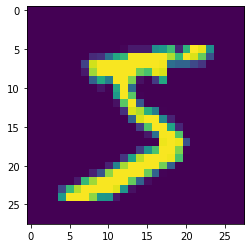

target -> 5


In [10]:
plt.imshow(X_train[0])
plt.show()
print('target ->', y_train[0])

In [12]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [13]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
X_train , _ , y_train , _ = train_test_split(X_train, y_train, test_size = 0.7, random_state = 100)

In [21]:
# 60000 -> 18000건 
X_train.shape, y_train.shape

((18000, 784), (18000, 10))

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18000, 784), (18000, 10), (10000, 784), (10000, 10))

In [32]:
def get_model():
    model = Sequential()

    model.add(Dense(50, activation='sigmoid', input_shape=(784,)))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))

    model.add(Dense(10, activation='softmax'))

    return model

In [34]:
model = get_model()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer,
              loss ='categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

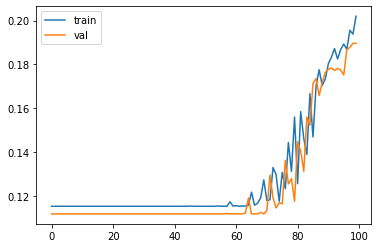

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [39]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1]) # result는 loss, accuracy 정보를 담고 있다.
# underfitting 된 모습을 연출해봄.

313/313 [==============================] - 0s 1ms/step - loss: 2.2611 - accuracy: 0.1941
Test accuracy : 0.1941000074148178


ResNet - 가중치를 초기화 하는 he_normal

In [42]:
# sigmoid == tanh , AlexNet -> relu(Rectified Linear Unit)
def improve_get_model():
    model = Sequential()

    model.add(Dense(50, activation='sigmoid', input_shape=(784,), kernel_initializer='he_normal'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='he_normal'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='he_normal'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='he_normal'))

    model.add(Dense(10, activation='softmax'))

    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [45]:
model = improve_get_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

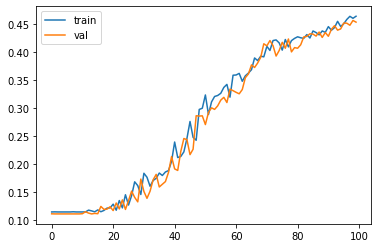

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [48]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.7706 - accuracy: 0.4480
Test accuracy : 0.4480000138282776


In [ ]:
# sigmoid == tanh , AlexNet -> relu(Rectified Linear Unit)
def improve_activation_get_model():
    model = Sequential()

    model.add(Dense(50, activation='relu', input_shape=(784,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    optimizer = SGD(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = improve_activation_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

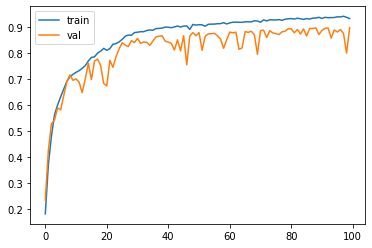

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [56]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8989
Test accuracy : 0.8988999724388123


In [60]:
# adaptive learning methods => Adam , RMSprop
def improve_optimization_get_model():
    model = Sequential()

    model.add(Dense(50, activation='relu', input_shape=(784,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = improve_optimization_get_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_21 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_22 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                510       
Total params: 47,410
Trainable params: 47,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

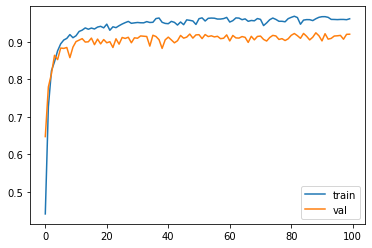

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [63]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.5189 - accuracy: 0.9180
Test accuracy : 0.9179999828338623


- 배치 정규화
- 평균 0, 분산 1 정규화를 통해서 학습이 잘 일어나도록 도와주는 방식
- 각 피쳐별 배치정규화를 진행

In [69]:
def normalization_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model = normalization_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [78]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.9389 - accuracy: 0.6978
Test accuracy : 0.6977999806404114


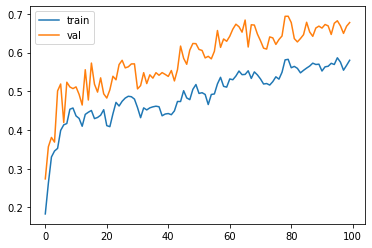

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

- dropout, earlystopping

In [74]:
def dropout_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model = dropout_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [77]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.9389 - accuracy: 0.6978
Test accuracy : 0.6977999806404114


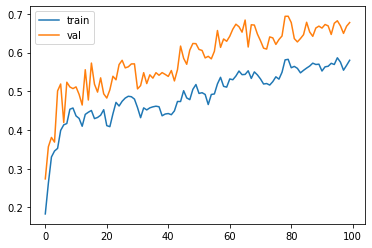

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [81]:
def dropout_batchnormalization_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model = dropout_batchnormalization_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [84]:
result = model.evaluate(X_test, y_test)
print('Test accuracy :', result[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1586 - accuracy: 0.9604
Test accuracy : 0.9603999853134155


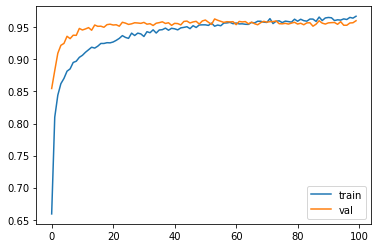

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [87]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1, callbacks=callbacks)

Epoch 1/100
394/394 [==============================] - 1s 3ms/step - loss: 0.1196 - accuracy: 0.9629 - val_loss: 0.1613 - val_accuracy: 0.9585
Epoch 2/100
394/394 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9646 - val_loss: 0.1663 - val_accuracy: 0.9570
Epoch 3/100
394/394 [==============================] - 1s 3ms/step - loss: 0.1249 - accuracy: 0.9622 - val_loss: 0.1670 - val_accuracy: 0.9569
Epoch 4/100
394/394 [==============================] - 1s 3ms/step - loss: 0.1155 - accuracy: 0.9638 - val_loss: 0.1752 - val_accuracy: 0.9548
